In [183]:
# Modules

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import psyplot
import psyplot.project as psy
import os
import psutil
import pandas as pd

In [125]:
T_CHUNK = 200
chunks={
    'time' : T_CHUNK, 
#     'lat'  : 10,
#     'lon'  : 10,
#     'lev'  : 10
}

In [126]:
# data
path1 = '~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/'
filename1 = path1 + 'so2_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'

DS1 = xr.open_dataset(filename1,chunks=chunks)

/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'so2' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


In [127]:
# _time = [t.strftime() for t in DS1['time'].values]
# _time = pd.to_datetime(_time)
# DS1['time'].values = _time

In [128]:

da = DS1['so2'].isel(lev=69)#[{'time':slice(None,None,100)}]

In [131]:
# da.load();

# da.isel(time=1970).plot()

_dm = da
_dm = _dm.mean(['lat','lon'])

# _dm['time']

In [141]:
#we are loading into RAM (make sure you dont load massive datasets)
_dm.load()

<xarray.DataArray 'so2' (time: 1980)>
array([5.0548395e-11, 3.9269813e-11, 3.2442573e-11, ..., 3.7748091e-10,
       4.8502968e-10, 6.2850125e-10], dtype=float32)
Coordinates:
    lev      float64 -992.6
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

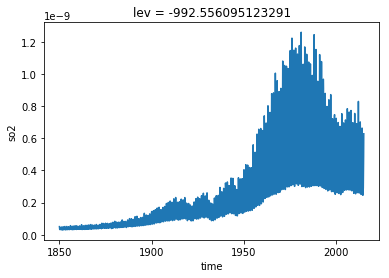

In [142]:
_dm.plot()

In [133]:
#lets do a rooling mean
_dr = _dm.rolling({'time':100},
            min_periods=1,
            center=True
           )

In [134]:
_drm = _dr.mean()

In [138]:
_drm.load()

<xarray.DataArray (time: 1980)>
array([3.6973109e-11, 3.6945731e-11, 3.6843174e-11, ..., 4.2048900e-10,
       4.2325787e-10, 4.2526793e-10], dtype=float32)
Coordinates:
    lev      float64 -992.6
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [179]:
def custom_plot():
    ax = plt.axes()
    _dm.plot(ax=ax,
             marker='.',
             linewidth=0,
             label = 'all points',
             alpha=.1
            )
    _drm.plot(ax=ax,
             marker='',
             linewidth=1,
             label = 'running mean [100 points]'
            )
    ax.legend()
    ax.grid()
    ax.set_ylabel('so2')

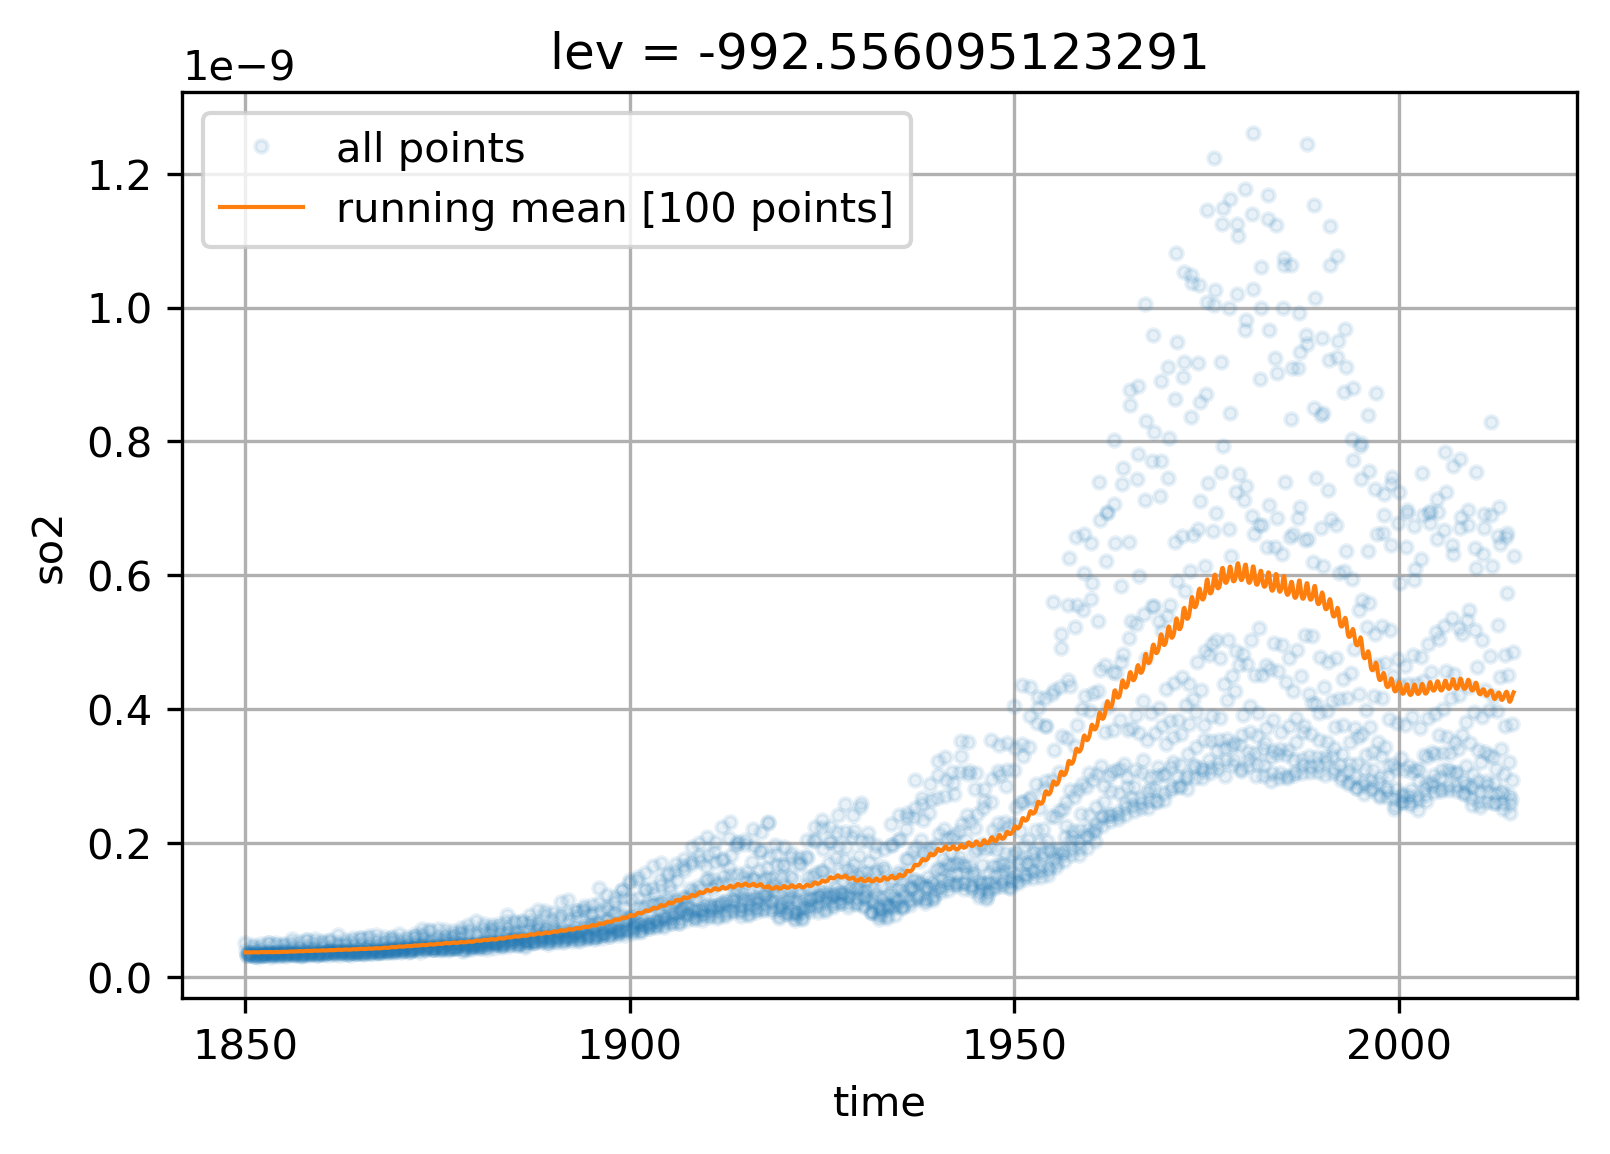

In [184]:
custom_plot()

In [185]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

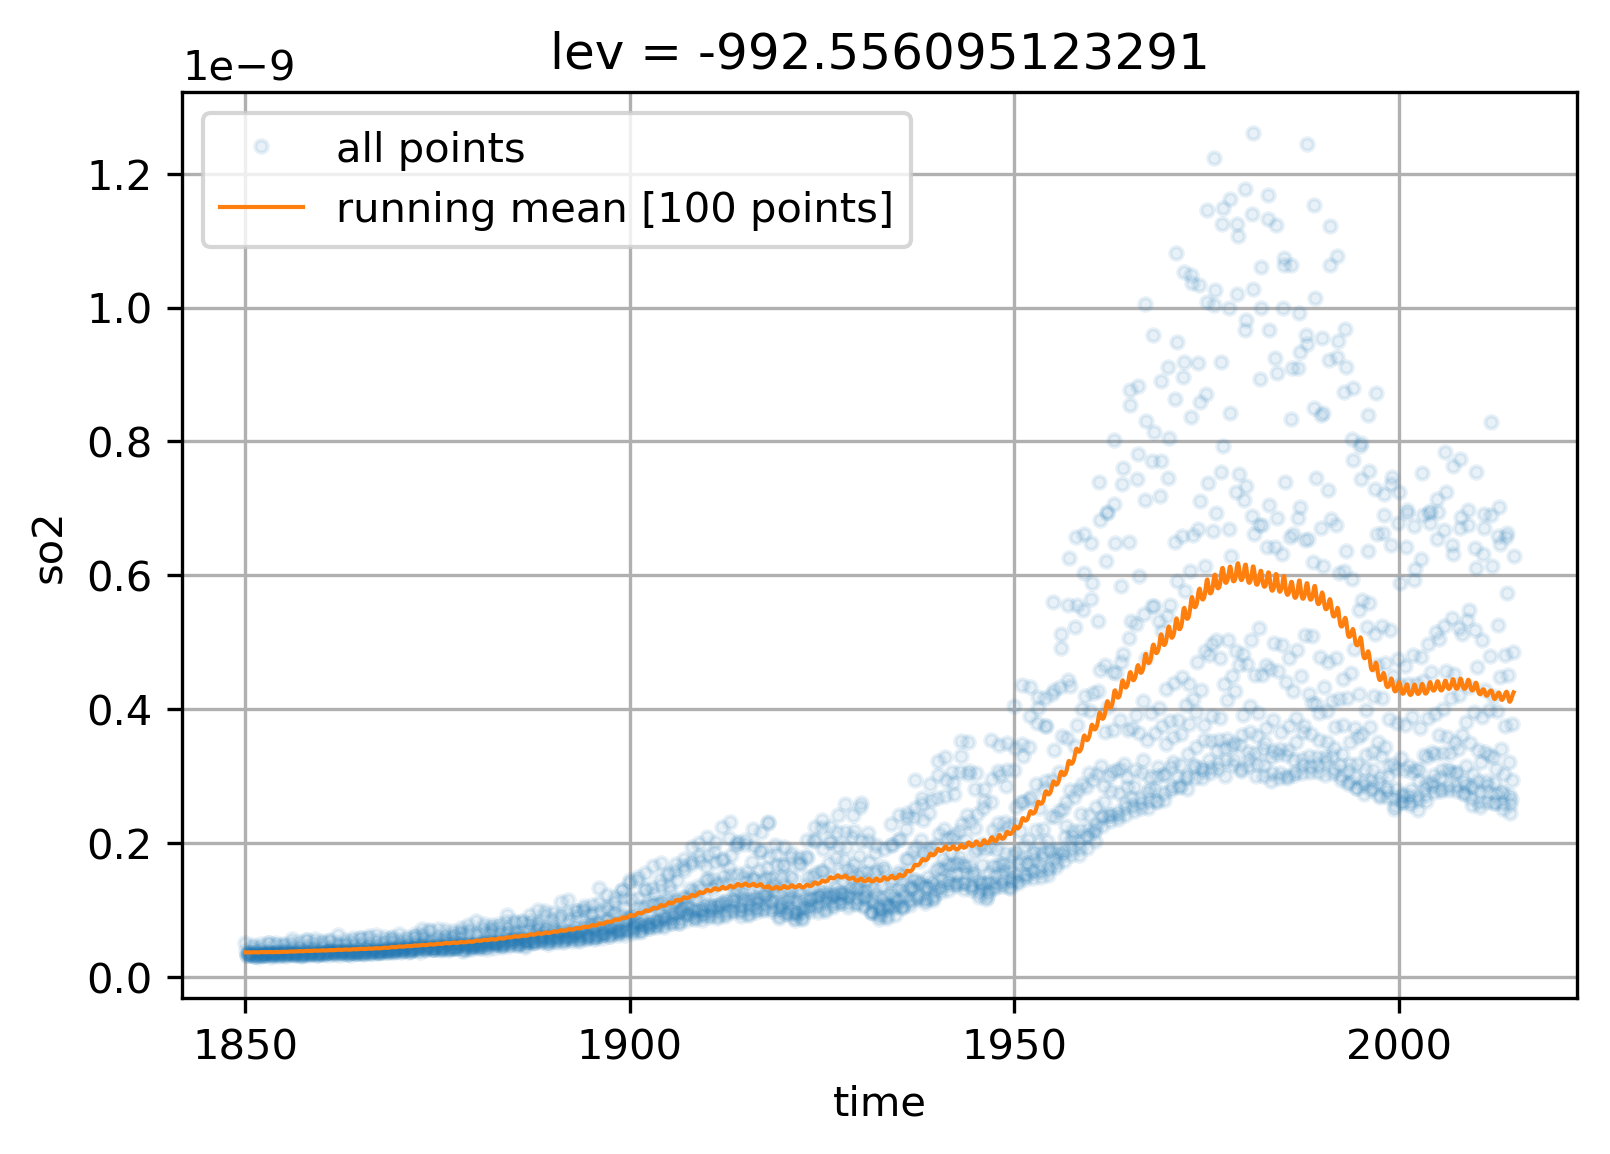

In [186]:
custom_plot()